In [ ]:
import numpy as np
import util as util
from linear_model import LinearModel

Load the datasets:

In [ ]:
class Dataset:
    def __init__(self, train_path, eval_path):
        self.x_train, self.y_train = util.load_dataset(train_path, add_intercept=False)
        self.x_val, self.y_val = util.load_dataset(eval_path, add_intercept=False)
        self.x_train_intercept, self.y_train_intercept = util.load_dataset(train_path, add_intercept=True)
        self.x_val_intercept, self.y_val_intercept = util.load_dataset(eval_path, add_intercept=True)
        
ds1 = Dataset('/content/data/ds1_train.csv', '/content/data/ds1_valid.csv')
ds2 = Dataset('/content/data/ds2_train.csv', '/content/data/ds2_valid.csv')

Let's take a look at the two training sets:

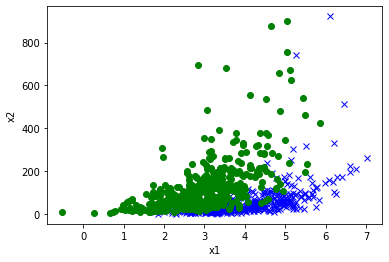

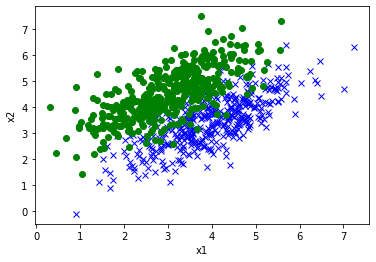

In [ ]:
util.myplot(ds1.x_train, ds1.y_train)
util.myplot(ds2.x_train, ds2.y_train)

In [ ]:
def h(theta, x):
    """vectorized implementation of h_theta(x)
    Args:
        theta: Shape (n,)
        x: Shape (m,n)
    
    Returns:
        numpy array of shape (m,)
    """
    return 1/(1+np.exp(-np.dot(x,theta)))

In [ ]:
def gradient(x, y, theta):
    """
    Args:
        x: numpy array of shape (m,n)
        y: numpy array of shape (m,)
        theta: numpy array of shape (n,)
        
    """
    m, = y.shape
    return -1/m * np.dot(x.T, y - h(theta, x))

In [ ]:
def hessian(x, y, theta):
    """
    Args:
        x: numpy array of shape (m,n)
        y: numpy array of shape (m,)
        theta: numpy array of shape (n,)
        
    """  
    m, = y.shape
    htx = np.reshape(h(theta,x), (-1,1))
    return 1/m * np.dot(x.T, x*htx*(1-htx))

Now we can define our logistic regression model:

In [ ]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        def nexttheta(theta):
            grad = gradient(x,y,theta)
            H = hessian(x,y,theta)
            H_inv = np.linalg.inv(H)
            return theta - np.dot(H_inv, grad)
        
        
        m,n = x.shape
        theta_prev = np.zeros(n)
        theta_next = nexttheta(theta_prev)
        
        while np.linalg.norm(theta_prev - theta_next, 1) > self.eps:
            theta_prev = theta_next
            theta_next = nexttheta(theta_prev)
            
        self.theta = theta_next
        

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # preds = h((self.theta), x)
        # return preds >= 0.5
        return (x @ self.theta) >= 0

Define a classifier and train it on our training data:

In [ ]:
logreg1 = LogisticRegression()
logreg1.fit(ds1.x_train_intercept, ds1.y_train_intercept)
y_pred = logreg1.predict(ds1.x_val_intercept)
(y_pred == ds1.y_val_intercept).sum()/y_pred.shape[0]

0.9

Finally, let's plot the decision boundary on the training set and on the validation set:

theta for dataset1: [-6.26018491  2.47707251 -0.0299125 ]


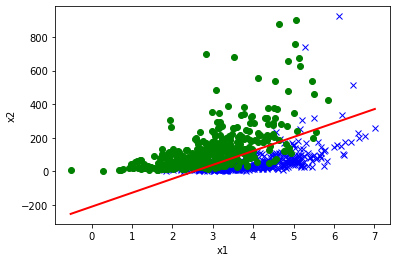

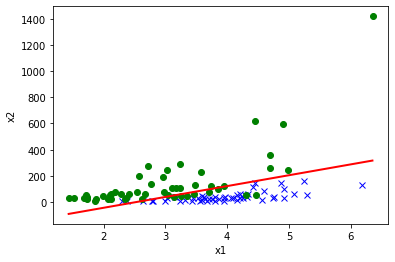

In [ ]:
print("theta for dataset1:", logreg1.theta)
util.myplot(ds1.x_train, ds1.y_train, logreg1.theta)
util.myplot(ds1.x_val, ds1.y_val, logreg1.theta)

Let's do the same for dataset2:

theta for dataset2: [ 2.38425454  3.6371206  -3.81234337]


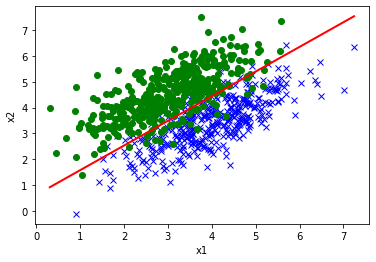

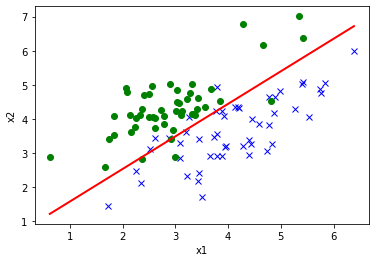

In [ ]:
logreg2 = LogisticRegression()
logreg2.fit(ds2.x_train_intercept,ds2.y_train_intercept)

print("theta for dataset2:", logreg2.theta)
util.myplot(ds2.x_train, ds2.y_train, logreg2.theta)
util.myplot(ds2.x_val, ds2.y_val, logreg2.theta)